# TASK_3


## To Explore Decision Tree Algorithm

For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

Dataset :https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing


In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import numpy as np
import os

In [2]:
data=pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


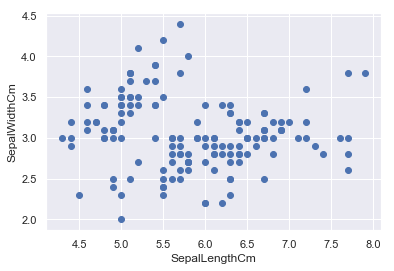

In [3]:
# Creating a scatter plot 
plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'])

plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()

In [4]:
# Removing unnecessary columns
data.drop(['Id'],inplace=True,axis=1)

In [5]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y1=le.fit_transform(y)

In [8]:
# Splitting the data into training and testing set
x1= data.copy()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size = 0.25, random_state = 0)

In [9]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [11]:
# Prediction
y_pred = classifier.predict(X_test)

In [12]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9736842105263158

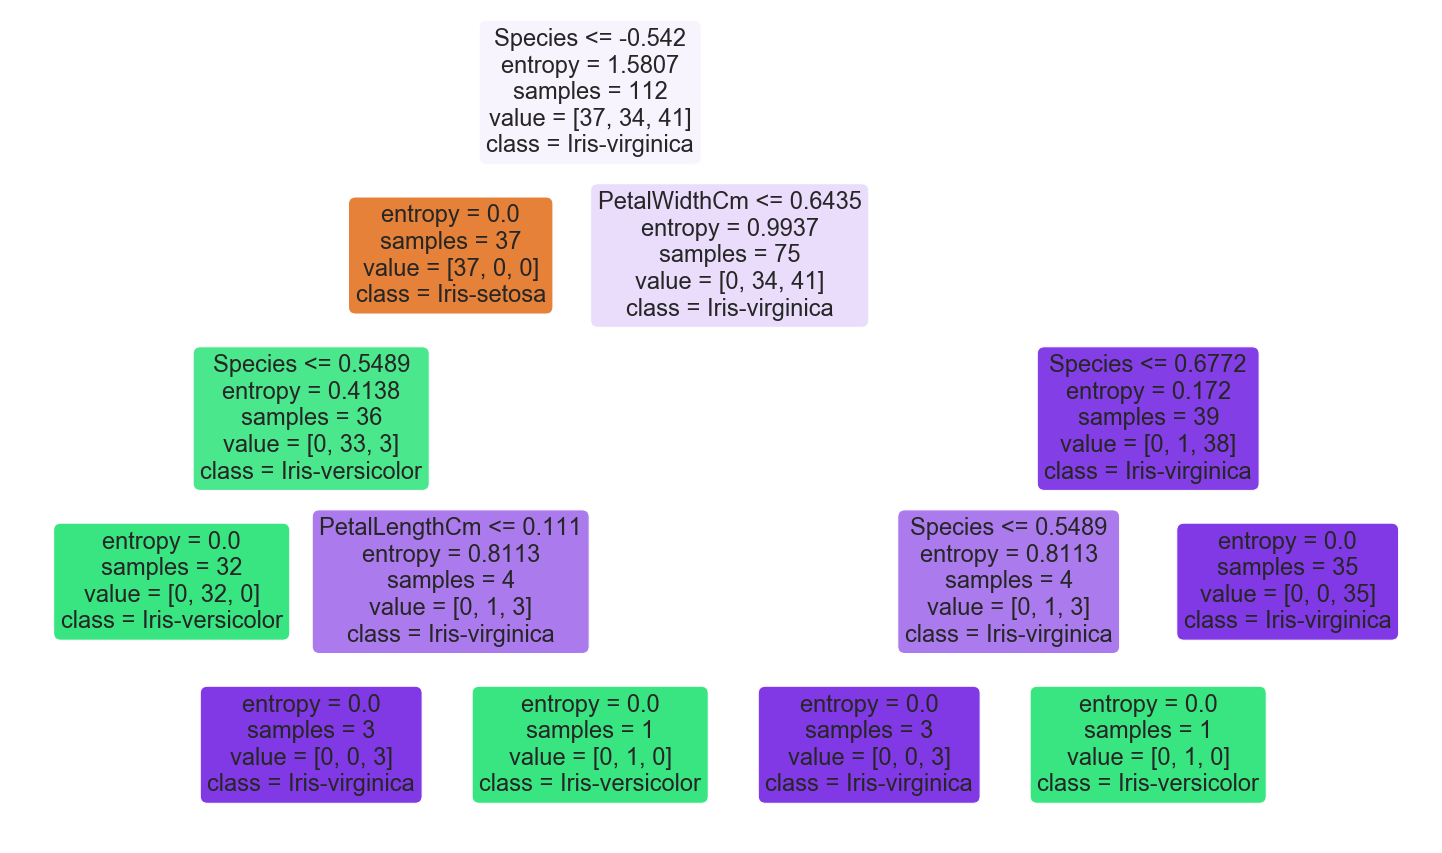

In [33]:
from sklearn.tree import plot_tree

X1=data.iloc[:,1:5]
f_name=X1.columns.tolist()
col_name=data['Species'].unique().tolist()
plt.figure(figsize=(25,15))
tree_image = plot_tree(classifier,feature_names=f_name,class_names=col_name,max_depth=5,precision=4,label="all",filled=True,rounded=True)
plt.savefig('showTree')